# Notebook Regression - Diamonds price dataset

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn
import os as os

#### Imortation du jeu de données et affichage de l'entête

In [4]:
data_pd = pd.read_csv("diamonds.csv", na_values = '')
size_dataset = data_pd.shape
print( "Rows = ", size_dataset[0])
print( "Columns = ", size_dataset[1])
columns_reshape = ['Unnamed: 0','carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity','price']
data_pd = data_pd[columns_reshape]
data_pd.head()

Rows =  53940
Columns =  11


,Unnamed: 0,carat,depth,table,x,y,z,cut,color,clarity,price
0,1,0.23,61.5,55.0,3.95,3.98,2.43,Ideal,E,SI2,326
1,2,0.21,59.8,61.0,3.89,3.84,2.31,Premium,E,SI1,326
2,3,0.23,56.9,65.0,4.05,4.07,2.31,Good,E,VS1,327
3,4,0.29,62.4,58.0,4.20,4.23,2.63,Premium,I,VS2,334
4,5,0.31,63.3,58.0,4.34,4.35,2.75,Good,J,SI2,335


In [5]:
data_pd.info()
index_num = ['carat', 'depth', 'table', 'x', 'y', 'z']
index_cat = ['cut', 'color', 'clarity']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   depth       53940 non-null  float64
 3   table       53940 non-null  float64
 4   x           53940 non-null  float64
 5   y           53940 non-null  float64
 6   z           53940 non-null  float64
 7   cut         53940 non-null  object 
 8   color       53940 non-null  object 
 9   clarity     53940 non-null  object 
 10  price       53940 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
data_pd.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00


In [7]:
print(data_pd.values[10])

[11 0.3 64.0 55.0 4.25 4.28 2.73 'Good' 'J' 'SI1' 339]


#### Mise en forme du jeu de données

In [8]:
data = data_pd.values
y = data[:,-1]

# ID de l'enregistrement
X_id = data[:,0]
# Données
X = data[:,1:-1]

print("X shape :", X.shape)
print("y shape : ", y.shape)

X shape : (53940, 9)
y shape :  (53940,)


from sklearn.preprocessing import LabelEncoder
categorical_cols = ['cut', 'color', 'clarity']
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
data_encoded = data_pd.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

cols_for_corr = numerical_cols + categorical_cols 
corr_matrix = data_encoded[cols_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="plasma")
plt.title('Matrice de corrélation')
plt.show()
print("Matrice de corrélation pour alert:")
print(corr_matrix['alert'].sort_values(ascending=False))

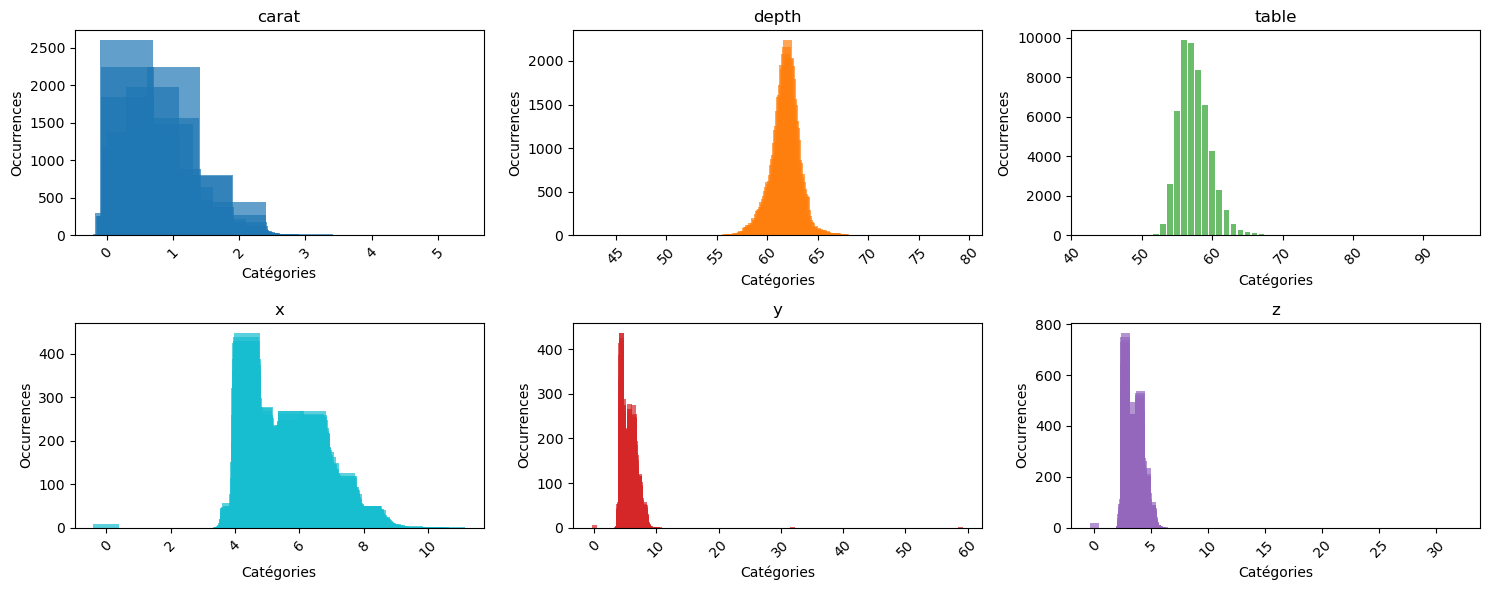

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:cyan','tab:red','tab:purple' ] 
axes = axes.ravel()

for k in range(len(index_num)):
    ax = axes[k]
    color = colors[k]
    array = X[:, k]
    #unique, counts = np.unique(array, return_counts=True)
    unique, counts = np.unique(array, return_counts=True)
    #ax.hist(array, bins=10, color  = color, alpha= 0.7)
    ax.bar(unique, counts, color  = color, alpha= 0.7)
    ax.set_xlabel("Catégories")
    ax.set_ylabel("Occurrences")
    ax.set_title(index_num[k])
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

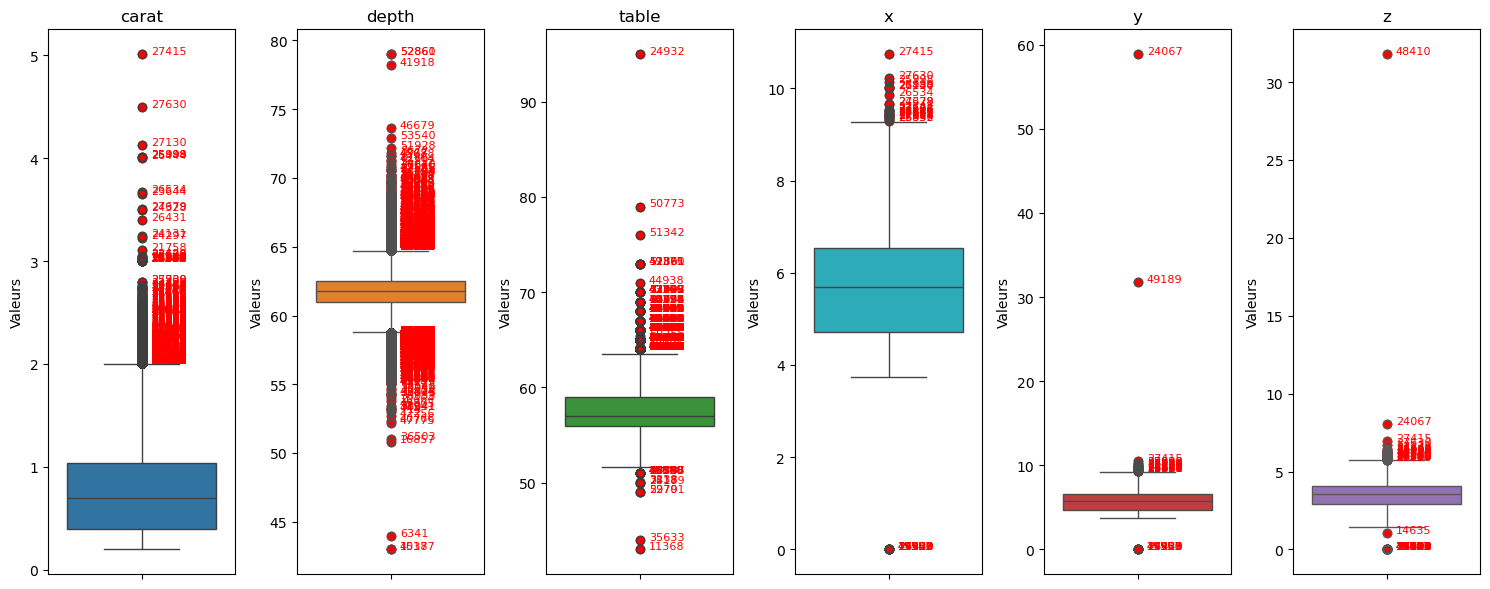

In [10]:
import seaborn as sns



fig, axes = plt.subplots(1, 6, figsize=(15, 6))
axes = axes.ravel()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:cyan', 'tab:red', 'tab:purple']

for k in range(len(index_num)):
    ax = axes[k]
    color = colors[k]
    array = X[:, k]
    # Calcul Q1, Q3 et IQR
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)
    IQR = Q3 - Q1

    # Seuils outliers
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR

    outliers_index = np.where((array < low) | (array > high))[0]
    outliers_values = array[outliers_index]

    for i, (idx, val) in enumerate(zip(outliers_index, outliers_values)):
        ax.scatter(0, val, color='red')  # point
        ax.text(0.05, val, str(idx), fontsize=8, color='red')  # id

    sns.boxplot(y=array, ax=ax, color=color)
    ax.set_xlabel("")  # pas pertinent ici
    ax.set_ylabel("Valeurs")
    ax.set_title(columns_reshape[k+1])
    ax.tick_params(axis='x', labelbottom=False)  # Pas de labels x

plt.tight_layout()
plt.show()


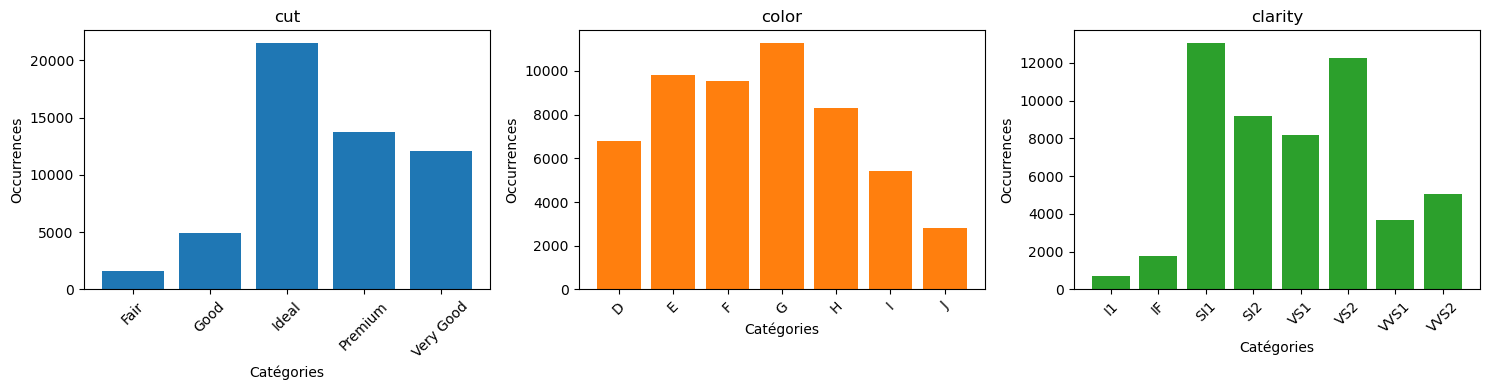

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ['tab:blue', 'tab:orange', 'tab:green'] 

for k in range(len(index_cat)):
    ax = axes[k]
    color = colors[k]
    array = X[:, k+6]
    unique, counts = np.unique(array, return_counts=True)

    ax.bar(unique, counts, color=color)
    ax.set_xlabel("Catégories")
    ax.set_ylabel("Occurrences")
    ax.set_title(index_cat[k])
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

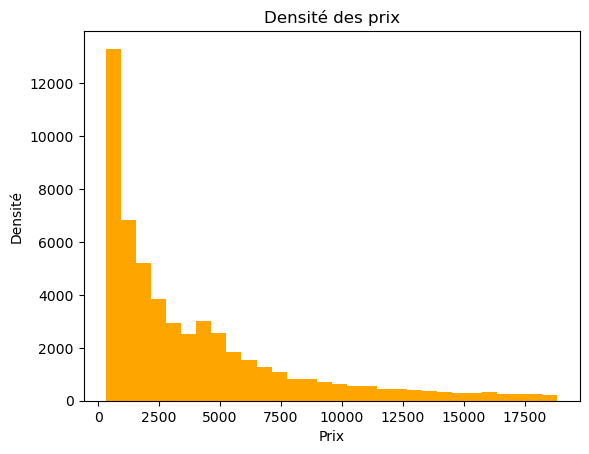

In [12]:

unique, counts = np.unique(y, return_counts=True)
#plt.bar(unique, counts)
plt.hist(y, bins = 30, color="orange")
plt.xlabel("Prix")
plt.ylabel("Densité")
plt.title("Densité des prix")

plt.show()



In [13]:
from sklearn.preprocessing import LabelEncoder

data_Label_encoded = np.concatenate((X,y.reshape(-1,1)), axis = 1)
label_encoders = {}

for k in range(6,6+len(index_cat)):
    le = LabelEncoder()
    data_Label_encoded[:,k] = le.fit_transform(data_Label_encoded[:,k])

cols_label_enc = index_num + index_cat + ['price']
print(data_Label_encoded.shape)
print(data_Label_encoded[:5])
data_Label_encoded = data_Label_encoded.astype(float)
print("_________________")
print(type(data_Label_encoded))
print(data_Label_encoded.dtype)
print(data_Label_encoded.shape)

(53940, 10)
[[0.23 61.5 55.0 3.95 3.98 2.43 2 1 3 326]
 [0.21 59.8 61.0 3.89 3.84 2.31 3 1 2 326]
 [0.23 56.9 65.0 4.05 4.07 2.31 1 1 4 327]
 [0.29 62.4 58.0 4.2 4.23 2.63 3 5 5 334]
 [0.31 63.3 58.0 4.34 4.35 2.75 1 6 3 335]]
_________________
<class 'numpy.ndarray'>
float64
(53940, 10)


In [14]:
def visualisation_corr_matrix(corr_matrix , labels , cmap="coolwarm", val_case = True, fontsize_labels = 10):
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(corr_matrix, cmap=cmap, interpolation='nearest', vmin=-1, vmax=1)

    # Titre et colorbar
    ax.set_title('Matrice de corrélation avec Label Encoding', fontsize=14, pad=15)
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Coefficient de corrélation', rotation=270, labelpad=15)

    # Noms des colonnes
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=90, fontsize=fontsize_labels)
    ax.set_yticklabels(labels, fontsize=fontsize_labels)

    # Afficher les valeurs dans chaque case
    if val_case ==True: 
        for i in range(len(corr_matrix)):
            for j in range(len(corr_matrix)):
                val = corr_matrix[i, j]
                color = 'black' if abs(val) < 0.5 else 'white'  # contraste auto
                ax.text(j, i, f"{val:.2f}", ha='center', va='center', color=color, fontsize=8)

    plt.tight_layout()
    plt.show()


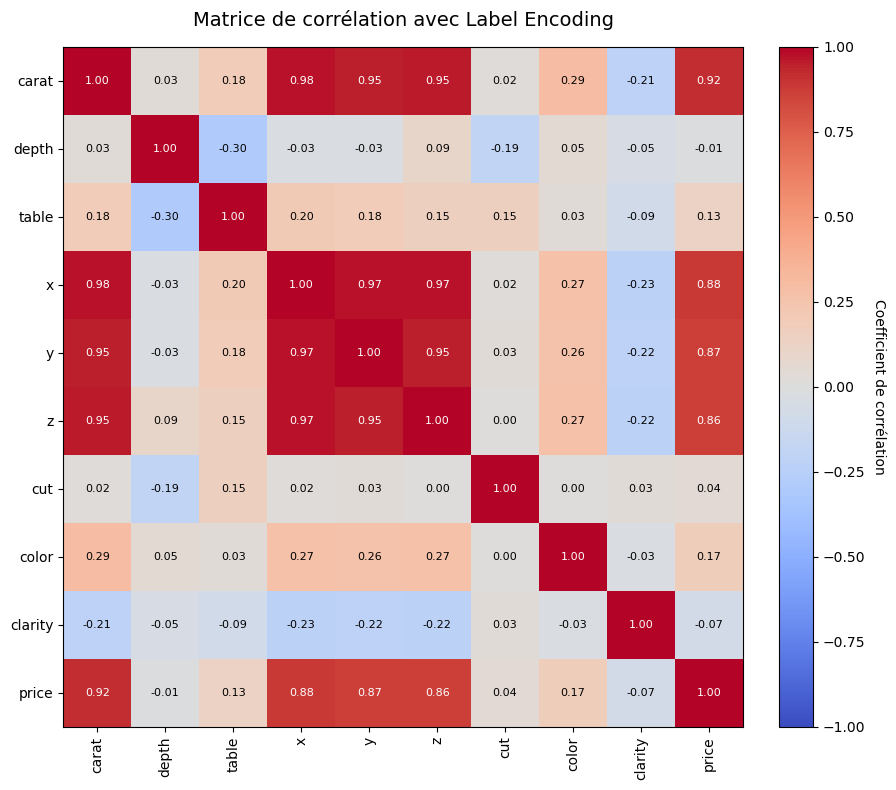

In [19]:
corr_matrix = np.corrcoef(data_Label_encoded.astype(float).T)

visualisation_corr_matrix(corr_matrix, labels= cols_label_enc)

Corr_mat shape :  (27, 27)
X_num shape :  (53940, 6)
Hot shape (53940, 20)
data_hot_encoded shape :  (53940, 27)


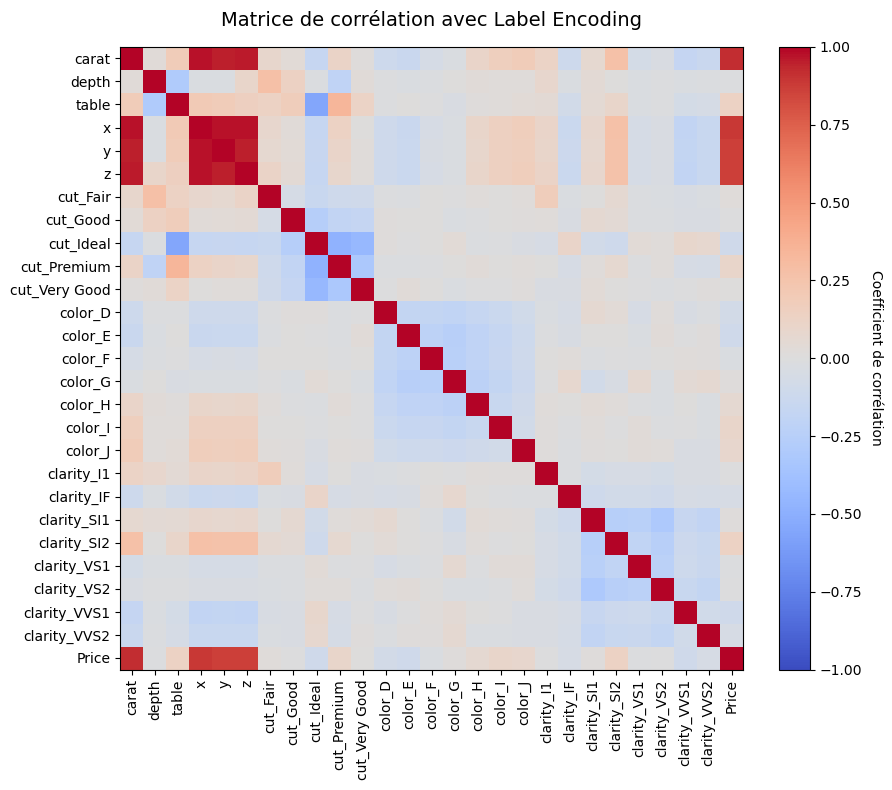

In [16]:
from sklearn.preprocessing import OneHotEncoder

X_num = X[:, 0:len(index_num)]

Hot_list = []         # pour stocker les blocs encodés
column_names = []     # pour les noms de colonnes

for k, col_name in zip(range(6, 6+len(index_cat)), index_cat):
    enc = OneHotEncoder(sparse_output=False)
    encoded = enc.fit_transform(X[:, k].reshape(-1, 1))
    Hot_list.append(encoded)
    # Ajoute les noms de colonnes encodées
    column_names.extend([f"{col_name}_{cat}" for cat in enc.categories_[0]])

# Concatène toutes les colonnes encodées horizontalement
Hot = np.concatenate(Hot_list, axis=1)

# Concatène le tout : variables numériques + encodées + variable cible
data_hot_encoded = np.concatenate((X_num, Hot, y.reshape(-1, 1)), axis=1)

# Calcul de la matrice de corrélation
corr_matrix_one_hot = np.corrcoef(data_hot_encoded.astype(float).T)

# Ajout des noms complets des colonnes
cols_for_corr_hot = index_num + column_names + ["Price"]
print("Corr_mat shape : ", corr_matrix_one_hot.shape)
print("X_num shape : ", X_num .shape)
print("Hot shape", Hot.shape)
print("data_hot_encoded shape : ", data_hot_encoded.shape)
visualisation_corr_matrix(corr_matrix=corr_matrix_one_hot, labels= cols_for_corr_hot, cmap="coolwarm", val_case=False)


#### Séparation de l'ensemble de test et d'apprentissage

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, train_size= 0.80)

print('Taille train : ', X_train.shape, ",", y_train.shape)
print("Taille test : ", X_test.shape, ",", y_test.shape)

Taille train :  (43152, 9) , (43152,)
Taille test :  (10788, 9) , (10788,)


#### Normalisation et centrage des données

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Ajuster aux valeurs d'apprentissage
scaler.fit(X_train)

ValueError: could not convert string to float: 'Premium'